<a href="https://colab.research.google.com/github/YuvarajCU/Hospital-Patients-Readmission-Prediction/blob/main/Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Capstone Title - Using artificial intelligence for cancer imaging **
*## Domain - Data Science*

*Author : Yuvaraj C U*

Description:
This is a Capstone project as a part of the certification program - Integrated Program on Data Science, Machine Learning & Artificial Intelligence by HeroVired and mentored by UltraTherapeutics through Belong learning portal

*Note: The coding is done in the Google Colab and hence the syntaxes used would be specific for colab*

Link to view the code in Colab : https://colab.research.google.com/drive/1DlEkYa84Ax3895CVmXe3Tik4mSAn-gbI?usp=sharing


## Project Task 1: Setting up image data

### Task Description:
To use the Tensorflow input pipelines to import the dataset of CT scans of cancer cases and process them and make them useful and ready to be used in the model that will be built in Task 2 for Classification purpose.

### Dataset Description:
Four folders containing CT scan images in jpeg format are provided. Data contain 3 cancer types which are Type 1, Type 2, Type 3 and 1 folder for the normal cell. Data folder is the main folder that contains all the step folders. Inside the Data folder are test , train , valid.
Class labels are the names of the folders.



### 1. Importing Dependencies

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import os
import cv2
import shutil

### 2. Uploading the Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp /content/drive/MyDrive/Data-2.zip /content/


In [ ]:
!unzip /content/Data-2.zip


Archive:  /content/Data-2.zip
  inflating: __MACOSX/._Data-2       
  inflating: __MACOSX/Data-2/._valid  
  inflating: Data-2/.DS_Store        
  inflating: __MACOSX/Data-2/._.DS_Store  
  inflating: __MACOSX/Data-2/._test  
  inflating: __MACOSX/Data-2/._train  
  inflating: Data-2/valid/.DS_Store  
  inflating: __MACOSX/Data-2/valid/._.DS_Store  
  inflating: __MACOSX/Data-2/valid/._Type 1  
  inflating: __MACOSX/Data-2/valid/._normal  
  inflating: __MACOSX/Data-2/valid/._Type 3  
  inflating: __MACOSX/Data-2/valid/._Type 2  
  inflating: Data-2/test/.DS_Store   
  inflating: __MACOSX/Data-2/test/._.DS_Store  
  inflating: __MACOSX/Data-2/test/._Type 1  
  inflating: __MACOSX/Data-2/test/._normal  
  inflating: __MACOSX/Data-2/test/._Type 3  
  inflating: __MACOSX/Data-2/test/._Type 2  
  inflating: Data-2/train/.DS_Store  
  inflating: __MACOSX/Data-2/train/._.DS_Store  
  inflating: __MACOSX/Data-2/train/._Type 1  
  inflating: __MACOSX/Data-2/train/._normal  
  inflating: __MACO

In [ ]:
shutil.rmtree("/content/__MACOSX")

In [ ]:
path = "/content/Data-2"

for f in os.listdir(path):
  if f.startswith("."):
    os.remove(os.path.join(path, f))
    print("{f} removed.")

for f in os.listdir(path):
  path1=os.path.join(path,f)
  for filename in os.listdir(path1):
    if filename.startswith("."):
      os.remove(os.path.join(path1, filename))
      print(f"{filename} removed.")

{f} removed.
.DS_Store removed.
.DS_Store removed.
.DS_Store removed.


Note: Even after performing the above set of code, there might be some more hidden unwanted files that might cause trouble while working, which shall be removed using few extra lines of codes which are not mentioned here.

3. Removing Blurry images from the dataset

In [ ]:
def remove_blurred_images(path):
    images = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    for image in images:
        img = cv2.imread(os.path.join(path, image))
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        var = cv2.Laplacian(gray, cv2.CV_64F).var()
        if var < 100:
            os.remove(os.path.join(path, image))
            print(f"{image} removed, VAR value: {var}")
        else:
            print(f"{image} kept, VAR value: {var}")

In [ ]:
Root_Dir= "/content/Data-2"
for dir in os.listdir(Root_Dir):
  path1=os.path.join(Root_Dir,dir)
  for dir1 in os.listdir(path1):
    path2=os.path.join(path1,dir1)
    remove_blurred_images(path2)


12 - Copy - Copy.png kept, VAR value: 1023.2569183425428
11 - Copy (2) - Copy.png kept, VAR value: 2250.371271610346
10 - Copy (2) - Copy.png kept, VAR value: 928.1290760633963
12 - Copy (2) - Copy.png kept, VAR value: 967.5470042067919
11 - Copy (3).png kept, VAR value: 1932.231640945935
6 - Copy (2).png kept, VAR value: 766.5377680643691
11 (2).png kept, VAR value: 1936.4068969077264
8 - Copy (3).png kept, VAR value: 542.9367764717852
11.png kept, VAR value: 1932.231640945935
10 - Copy.png kept, VAR value: 871.0601703890933
8 - Copy (2) - Copy.png kept, VAR value: 775.5534619137262
7 (2) - Copy.png kept, VAR value: 691.0668664743843
21.png kept, VAR value: 604.6788400680647
10 (2) - Copy.png kept, VAR value: 1254.81504845097
6.png kept, VAR value: 432.39026720349926
6 - Copy (3).png kept, VAR value: 432.39026720349926
11 - Copy - Copy.png kept, VAR value: 1770.1891424950534
normal.png kept, VAR value: 297.5672514582967
10 - Copy - Copy.png kept, VAR value: 871.0601703890933
11 (2) - 

In [ ]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory('/content/Data-2/train')
test_ds=tf.keras.preprocessing.image_dataset_from_directory('/content/Data-2/test')
val_ds=tf.keras.preprocessing.image_dataset_from_directory('/content/Data-2/valid')

Found 528 files belonging to 4 classes.
Found 280 files belonging to 4 classes.
Found 68 files belonging to 4 classes.


## Project Task 2: Preprocessing Image Data

In [ ]:
img_height = 224
img_width = 224
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Data-2/train',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))


Found 528 files belonging to 4 classes.


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
])

augmented_train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))


In [ ]:
img_height = 224
img_width = 224
batch_size = 32

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Data-2/test',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))


Found 280 files belonging to 4 classes.


In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
])

augmented_test_ds = test_ds.map(lambda x, y: (data_augmentation(x, training=True), y))


In [ ]:
img_height = 224
img_width = 224
batch_size = 32

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Data-2/valid',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
normalized_val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


Found 68 files belonging to 4 classes.


### A concise code for task 2

In [ ]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
])

augmented_val_ds = val_ds.map(lambda x, y: (data_augmentation(x, training=True), y))


In [ ]:
import tensorflow as tf

def preprocess_datasets(train_ds, test_ds, val_ds):
    # Define the preprocessing layers
    normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)
    data_augmentation = tf.keras.Sequential([
        tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
        tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
    ])

    # Apply normalization to all datasets
    train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
    test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))
    val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))

    # Apply data augmentation only to the training dataset
    train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))

    return train_ds, test_ds, val_ds


In [ ]:
img_height = 224
img_width = 224
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Data-2/train',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Data-2/test',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/Data-2/valid',
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Preprocess the datasets using the preprocess_datasets function
train_ds, test_ds, val_ds = preprocess_datasets(train_ds, test_ds, val_ds)


Found 528 files belonging to 4 classes.
Found 280 files belonging to 4 classes.
Found 68 files belonging to 4 classes.


## Project Task 3 & 4: Training Deep Learning Model for Classification & Fine Tuning for Better Results


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt

from tensorflow.keras import regularizers

Epoch 1/50
17/17 [==============================] - 9s 355ms/step - loss: 5.4149 - accuracy: 0.2955 - val_loss: 3.0241 - val_accuracy: 0.1912
Epoch 2/50
17/17 [==============================] - 8s 362ms/step - loss: 2.7118 - accuracy: 0.3731 - val_loss: 2.4313 - val_accuracy: 0.3529
Epoch 3/50
17/17 [==============================] - 8s 428ms/step - loss: 2.1601 - accuracy: 0.4602 - val_loss: 1.9095 - val_accuracy: 0.5147
Epoch 4/50
17/17 [==============================] - 7s 365ms/step - loss: 1.8037 - accuracy: 0.5360 - val_loss: 1.6609 - val_accuracy: 0.5000
Epoch 5/50
17/17 [==============================] - 8s 435ms/step - loss: 1.6083 - accuracy: 0.5322 - val_loss: 1.5908 - val_accuracy: 0.5735
Epoch 6/50
17/17 [==============================] - 12s 625ms/step - loss: 1.5562 - accuracy: 0.5170 - val_loss: 1.4095 - val_accuracy: 0.5588
Epoch 7/50
17/17 [==============================] - 8s 430ms/step - loss: 1.4206 - accuracy: 0.5814 - val_loss: 1.3078 - val_accuracy: 0.5441
Epoch

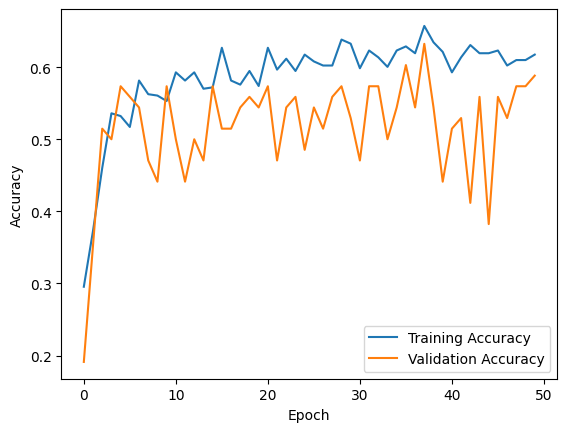

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    tf.keras.layers.Dense(4)
])


# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=50)

# Evaluate the model
loss, accuracy = model.evaluate(test_ds)

# Plot the training accuracy vs validation accuracy chart
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


From the graph it is evident that, upon increased Dataset, the model can perform well which can be proved by the increasing accuracy and cross validation score from the graph above.